In [26]:
%matplotlib inline
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from subprocess import Popen, PIPE, STDOUT

RANDOM_STATE = 42

## Mutator

Transmembrane domain mutator using the trained LSTM classifier.

Essentially, we have a trained classifier (see LSTM_TM_Classifier notebook) 
that outputs a 3-vector of softmax probs for
a given TM sequence belonging to a certain domain.

So the idea is to take a TM sequence belonging to one domain and mutate it using this classifier to make it "look like" a TM sequence from another domain.

The constraint being it still has to be an actual TM sequence - is it better to 
reject proposals that don't fit constraints or weight them to 0 in output probs i.e. if not helix, probs * 0, else 1?

In [24]:


!head ../tm_prediction/full_data/tmhmm/tm_seqs/eukaryote_data.txt

TRVFGTVGGVVCLGGMVFAPYAS
TRSIPSLVAGVGVGLLYLYSADS
QNYFTNAYYFGTLASTTTLMAPIPGKAF
AHAFIMIFFMVMPIMIGGFGNWLVPLML
MNIITSIFNVAGLISSIGALHLSFISLD
DKMPLFVWSVLITAILLLLSLPVLAGAI
LKPFFYKIAAAVTGGGGILYLAYRP
SSILIVLGLNSVIAFVYVLLLLIFAPLS
RTVVGLSWAAWGSAAVLVLILIGLSVHL
IKLYTLSVSCISSGLLVVTYSLGYINNM


In [69]:
def decode_seq(enc_seq, encoder):
    """
    decodes/encodes sequences
    """
    pass

def check_helix(seq, debug=False):
    """
    Checks if a sequence has a TM helix and returns probs
    """
    tmhmm="../tm_prediction/tools/tmhmm-2.0c/bin/tmhmm"
    
    fasta_in=">1\n{}".format(seq).encode('utf-8')
    
    p = Popen([tmhmm], stdout=PIPE, stdin=PIPE, stderr=STDOUT)   
    
    tmhmm_stdout = p.communicate(input=fasta_in)[0]
    
    output = tmhmm_stdout.decode()
    
    if debug:
        print(output)
    
    predhel = int(output.split('\t')[4].split('=')[-1])
    
    if predhel > 0:
        return True
    else:
        return False


In [71]:
a = ["TRVFGTVGGVVCLGGMVFAPYAS",
"TRSIPSLVAGVGVGLLYLYSADS",
"QNYFTNAYYFGTLASTTTLMAPIPGKAF",
"AHAFIMIFFMVMPIMIGGFGNWLVPLML",
"MNIITSIFNVAGLISSIGALHLSFISLD",
"DKMPLFVWSVLITAILLLLSLPVLAGAI",
"LKPFFYKIAAAVTGGGGILYLAYRP",
"SSILIVLGLNSVIAFVYVLLLLIFAPLS",
"RTVVGLSWAAWGSAAVLVLILIGLSVHL",
"IKLYTLSVSCISSGLLVVTYSLGYINNM"]

x = a[0]

In [74]:
model_path = "./model.ckpt"
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, model_path) 

ValueError: No variables to save

In [75]:
!pwd

/storage/fin/postdoc/tm_evolution/LSTM


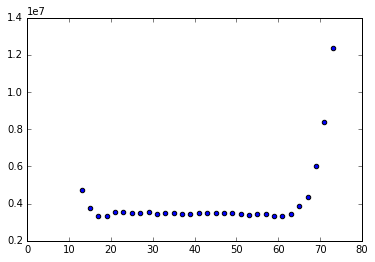

In [82]:
x = []
y = []
with open("/storage/fin/postdoc/bayehem/scores") as fh:
    for line in fh.readlines():
        line = line.strip()
        line = line.split(",")
        x.append(int(line[0]))
        y.append(-1 * float(line[1]))
        
plt.scatter(x,y)